In [29]:
import pandas as pd
import numpy as np
import imageio
import pymongo
import jieba
import matplotlib
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud
from pymongo import MongoClient

In [30]:
client = MongoClient('localhost', 27017)
goods_collection = client.youzhisan.scrapy_items
goods_info_list = list(goods_collection.find())

In [31]:
goods_df = pd.DataFrame(goods_info_list, columns=["raw_title", "view_price", "item_loc", "view_sales", "comment_count","title", "detail_url"])
goods_df.drop_duplicates(inplace=True)  # 原地修改，而不会返回副本
goods_df.describe(include="all")

,raw_title,view_price,item_loc,view_sales,comment_count,title,detail_url
count,4230,4230,4230,4230,4230,4230,4230
unique,3085,2058,102,122,435,3085,4230
top,小雨伞绘画幼儿园油纸伞女 古风流苏白色旗袍绸布伞手绘古装伞手,40.00,湖南 衡阳,1人收货,,小雨<span class=H>伞</span>绘画幼儿园<span class=H>油纸<...,//item.taobao.com/item.htm?id=566415600145&ns=...
freq,26,108,1052,1626,1752,26,1


In [32]:
title_list = goods_df.raw_title.values.tolist()
jieba.load_userdict("mydict.txt") 
title_word_list = []
for title in title_list:
    title_2 = title.replace("伞", "")  # 把所有的“伞”字去掉，防止干扰切词
    word_list = jieba.lcut(title_2, cut_all=False)
    title_word_list.append(word_list)

drop_duplicate = []
for item in title_word_list:
    drop_duplicate.append(list(set(item)))  # 对每个标题的词进行去重

all_word_list = []
for item in drop_duplicate:
    for word in item:
        all_word_list.append(word)

all_word_df = pd.DataFrame({"all_words": all_word_list})

all_words_grouped = all_word_df["all_words"].value_counts().reset_index(name="count")  # 新增列命名为count

all_words_grouped.columns = ["words", "count"]  # 重命名列

FileNotFoundError: [Errno 2] No such file or directory: 'mydict.txt'

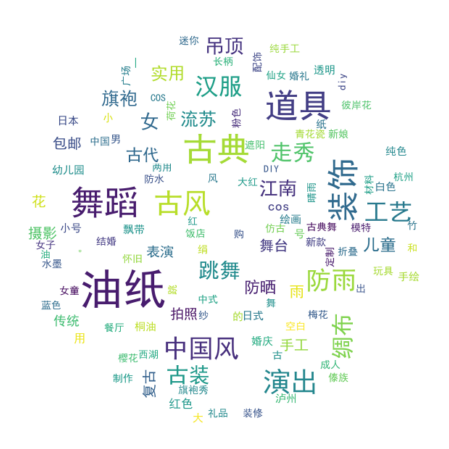

In [36]:
matplotlib.rcParams['figure.figsize']=(50.0,8.0)  # 这个是全局样式设置文件，可以动态修改，分别表示宽和高，单位是英尺
# matplotlib.rcdefaults()  # 恢复出厂设置
# pic = imread("youzhisan.jpg")
pic = imageio.imread("relative_files/youzhisan.jpg")
w_c = WordCloud(background_color="white", mask=pic, max_font_size=60, margin=1, font_path="relative_files/simhei.ttf")
wc = w_c.fit_words({x[0]: x[1] for x in all_words_grouped.head(120).values})
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
goods_df["view_price"] = goods_df["view_price"].apply(pd.to_numeric)
goods_df["view_sales"] = goods_df["view_sales"].str.replace("人收货", "").apply(pd.to_numeric)  # [[]]返回dataframe，[]返回series
goods_df.head(5)

,raw_title,view_price,item_loc,view_sales,comment_count,title,detail_url
0,舞蹈伞演出伞绸布伞古风伞跳舞伞工艺道具婚庆装饰伞中国风油纸伞,25.32,广东 东莞,4,,舞蹈<span class=H>伞</span>演出<span class=H>伞</spa...,//detail.tmall.com/item.htm?id=600409701999&ns...
1,油纸伞女古风流苏古典中国风江南遮晒雨实用汉服舞蹈道具装饰,34.52,湖南 湘潭,4,2,<span class=H>油纸</span><span class=H>伞</span>女...,//detail.tmall.com/item.htm?id=599092001127&ns...
2,油纸伞道具舞蹈走秀旗袍秀装饰古典江南中国风古风女汉服,59.85,浙江 杭州,4,4,<span class=H>油纸</span><span class=H>伞</span>道...,//detail.tmall.com/item.htm?id=594843074093&ns...
3,油纸伞女古风舞蹈伞演出旗袍走秀伞汉服吊顶装饰道具伞绸布伞实用,39.42,浙江 杭州,4,,<span class=H>油纸</span><span class=H>伞</span>女...,//detail.tmall.com/item.htm?id=599729712572&ns...
4,配汉服的伞 古风流苏仙女彼岸花配饰防雨遮阳实用古装女油纸伞,31.95,福建 厦门,4,3,配汉服的<span class=H>伞</span> 古风流苏仙女彼岸花配饰防雨遮阳实用古装...,//detail.tmall.com/item.htm?id=598066284571&ns...


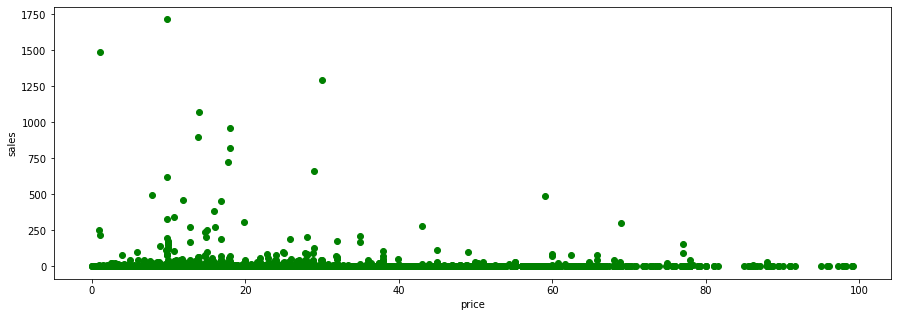

In [28]:
goods_df_normal = goods_df[goods_df["view_price"]<100]  # 剔除价格过高的数据
x = goods_df_normal["view_price"]
y = goods_df_normal["view_sales"]
plt.figure(figsize=[15, 5])
plt.scatter(x, y, color="green", label="price sales show")
plt.xlabel("price")
plt.ylabel("sales")
plt.show()